# Data Visualization

## Import Libraries

In [1]:
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


## Read Dataset

In [3]:
# Read Dataset
df = pd.read_csv('../thermofeeler/data/encoded_df.csv')
print('Number of Data points: ', df.shape[0])
print('Number of Features: ', df.shape[1])
print('features: ', df.columns.values)

# Show Dataset
df.head()

Number of Data points:  159849
Number of Features:  3
features:  ['Unnamed: 0' 'tweet_text' 'encoded_sentiment']


,Unnamed: 0,tweet_text,encoded_sentiment
0,0,@dilsonramoslima #Fato Acho que o Roger é um b...,0
1,1,#NOVIDADE! @LATAM_BRA acaba de anunciar novo v...,0
2,2,Quando tem #novidade😆 tem @novafm103 na área! ...,0
3,3,@RiodeNojeira #Novidade Taí o sucesso dos filh...,0
4,4,"[Livro/Novidades] Segredos, uma história de Lu...",0


In [4]:
# Drop unnamed column
df = df.drop(columns='Unnamed: 0')
df.head(3)

,tweet_text,encoded_sentiment
0,@dilsonramoslima #Fato Acho que o Roger é um b...,0
1,#NOVIDADE! @LATAM_BRA acaba de anunciar novo v...,0
2,Quando tem #novidade😆 tem @novafm103 na área! ...,0


In [5]:
# Created a sample dataframe, just for test...
df_sample = df.sample(n=100)
df_sample.shape

(100, 2)

In [6]:
df_sample.reset_index(inplace=True, drop=True)
df_sample.head()

,tweet_text,encoded_sentiment
0,- Aqui não é timeco kkkkk Vamos ser campeao 🐷🐷...,1
1,"Depois de cair 85%, Netshoes vai decepcionar o...",0
2,@anaisasgn Mesmo isso que acabaste de ler :)),1
3,@loliraivosa me diz pq :(,-1
4,"De IBM a AirBnb, todo design system atualmente...",1


In [7]:
sample_encoded = pd.get_dummies(df_sample, columns= ['encoded_sentiment'])
sample_encoded.head()

,tweet_text,encoded_sentiment_-1,encoded_sentiment_0,encoded_sentiment_1
0,- Aqui não é timeco kkkkk Vamos ser campeao 🐷🐷...,0,0,1
1,"Depois de cair 85%, Netshoes vai decepcionar o...",0,1,0
2,@anaisasgn Mesmo isso que acabaste de ler :)),0,0,1
3,@loliraivosa me diz pq :(,1,0,0
4,"De IBM a AirBnb, todo design system atualmente...",0,0,1


In [8]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


/Users/haroldinho/.pyenv/versions/3.8.12/envs/thermofeeler/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128055 (\N{PIG FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haroldinho/.pyenv/versions/3.8.12/envs/thermofeeler/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haroldinho/.pyenv/versions/3.8.12/envs/thermofeeler/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haroldinho/.pyenv/versions/3.8.12/envs/thermofeeler/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haroldinho/.pyenv/versions/3.8.12/envs/thermofeele

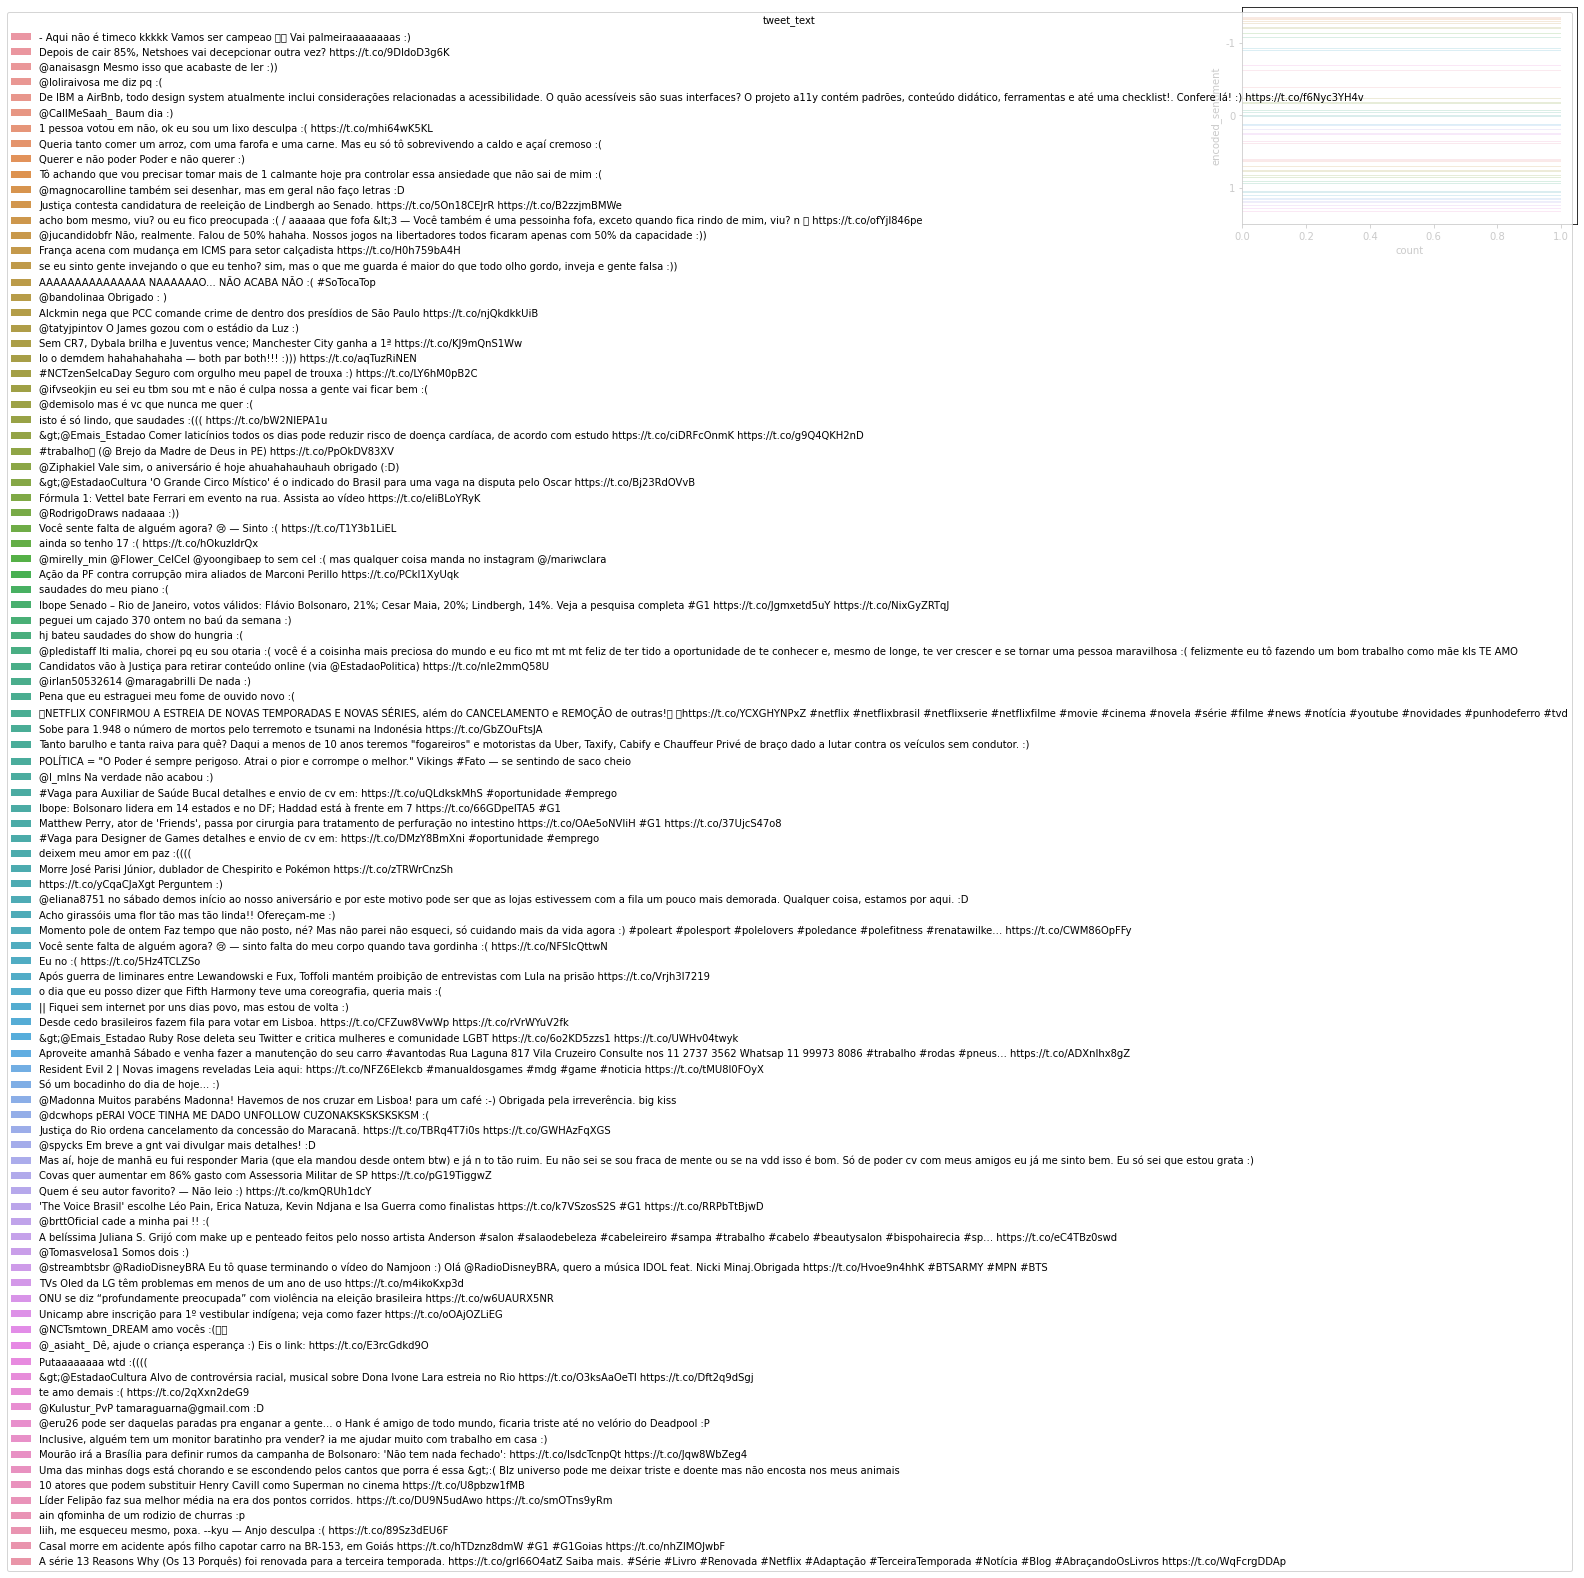

In [9]:
# Countplot
# style.use('seaborn-pastel') #sets the size of the charts
# style.use('seaborn-poster')
sns.countplot(y="encoded_sentiment", hue= 'tweet_text' ,data= df_sample);

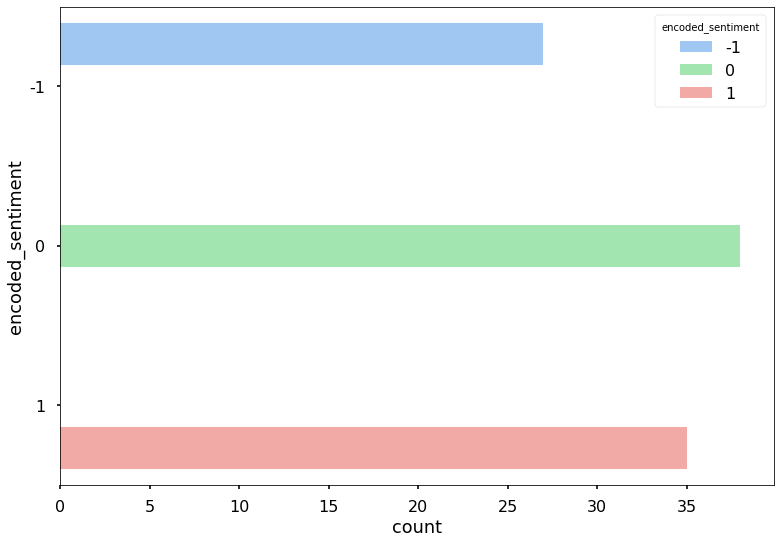

In [10]:
# Countplot
style.use('seaborn-pastel') #sets the size of the charts
style.use('seaborn-poster')
sns.countplot(y="encoded_sentiment", hue='encoded_sentiment', orient="h", data= df_sample);

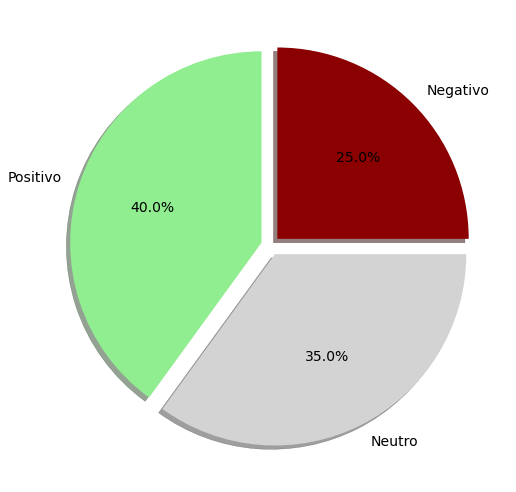

In [11]:
# Pie Plot
plt.pie([25,40,35],
        explode=[0.05,0.05,0.05],
        labels=['Negativo','Positivo','Neutro'],
        colors=['darkred','lightgreen','lightgray'],
        autopct='%1.1f%%',
        shadow=True,
        textprops={'fontsize': 14})
plt.savefig('piechart.png');

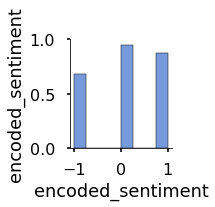

In [12]:
#sets the size of the charts
style.use('seaborn-poster')
style.use('seaborn-muted')
sns.pairplot(df_sample);#,hue='encoded_sentiment');

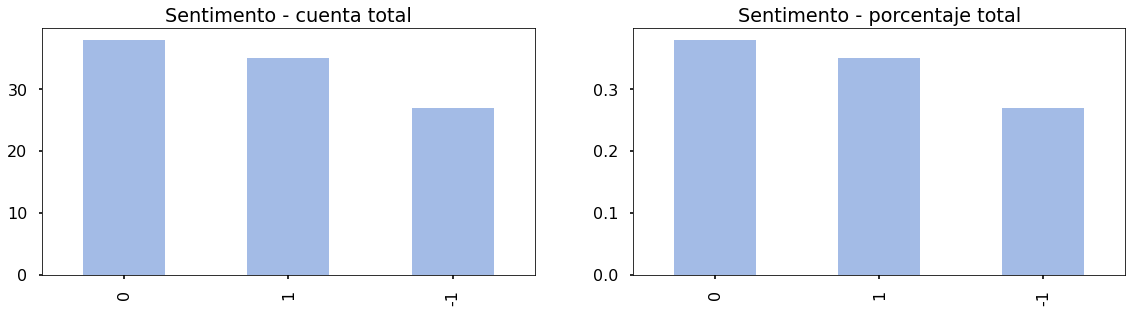

In [13]:
fig = plt.figure(figsize=(30,10)) #creamos un canvas o figura de 30x10 pixeles

# queremos ver un plot al costado del otro, para esto pensemos en una grilla (celdas)
plt.subplot2grid((2,3),(0,0))
df_sample['encoded_sentiment'].value_counts().plot(kind='bar', alpha=0.5)
plt.title('Sentimento - cuenta total')

# Hay manera un poco mas amigable de interpretar datos....con porcentajes!
plt.subplot2grid((2,3),(0,1))
df_sample['encoded_sentiment'].value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('Sentimento - porcentaje total')

plt.show()

In [14]:
# # La clase del ticket fue un factor de sobrevivencia (si viste Titanic, ya lo sabes!)
# fig = plt.figure(figsize=(10,5))
# #colors bgrcmykw
# df_sample[df.encoded_sentiment == 1 ].value_counts(normalize = True).plot(kind='bar', alpha=0.5)
# plt.title('Sobrevivientes por Clase de Ticket')
# plt.show()

In [15]:
# # hay mas sentimentos negativo o positivos??
# fig = plt.figure(figsize=(30,10))
# df.encoded_sentiment[df.encoded_sentiment == 0].value_counts(normalize = True).plot(kind='barh', alpha=0.5, color='br')
# plt.title('Sobrevivieron - Male vs Female -')
# plt.show()

## WordClould

In [21]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Start with one review:
text = df_sample
print(text)

# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

# Create and generate a word cloud image:
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=1000).generate(text)

# set the word color to black
wordcloud.recolor(color_func = black_color_func)

# set the figsize
plt.figure(figsize=[15,10])

# plot the wordcloud
plt.imshow(wordcloud, interpolation="bessel")

# remove plot axes
plt.axis("off")

# Display the generated image:
plt.show()

# Save the image in the img folder:
# wordcloud.to_file("img/first_review.png")

                                           tweet_text  encoded_sentiment
0   - Aqui não é timeco kkkkk Vamos ser campeao 🐷🐷...                  1
1   Depois de cair 85%, Netshoes vai decepcionar o...                  0
2       @anaisasgn Mesmo isso que acabaste de ler :))                  1
3                           @loliraivosa me diz pq :(                 -1
4   De IBM a AirBnb, todo design system atualmente...                  1
..                                                ...                ...
95  Líder Felipão faz sua melhor média na era dos ...                  0
96           ain qfominha de um rodizio de churras :p                  1
97  Iiih, me esqueceu mesmo, poxa. --kyu — Anjo de...                 -1
98  Casal morre em acidente após filho capotar car...                  0
99  A série 13 Reasons Why (Os 13 Porquês) foi ren...                  0

[100 rows x 2 columns]


TypeError: expected string or bytes-like object

In [20]:
# tweets source

tweets['source_new2'] = ''

for i in range(len(tweets['source_new'])):
    if tweets['source_new'][i] not in ['Twitter for Android ','Instagram ','Twitter Web Client ','Twitter for iPhone ']:
        tweets['source_new2'][i] = 'Others'
    else:
        tweets['source_new2'][i] = tweets['source_new'][i] 

tweets_by_type2 = tweets.groupby(['source_new2'])['followers_count'].sum()
tweets_by_type2.rename("",inplace=True)
explode = (1, 0, 0, 0, 0)
tweets_by_type2.transpose().plot(kind='pie',figsize=(20, 15),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of followers by Source bis', bbox={'facecolor':'0.8', 'pad':5})





NameError: name 'tweets' is not defined

In [ ]:
tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
sid = SentimentIntensityAnalyzer()
tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'



In [ ]:
tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()


In [ ]:
tweets[tweets.sentiment_type == 'NEGATIVE'].text.reset_index(drop = True)[0:5]

In [ ]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

# # # Prep TF-IDF Matrix for Word Clouds
# # data = df.transpose()
# # data.columns = ['document_bush_2001', 'document_obama_2009', 'document_trump_2017', 'document_biden_2021']
# # data.head()

# # change the value to black
# def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
#     return("hsl(0,100%, 1%)")
# # set the wordcloud background color to white
# # set max_words to 1000
# # set width and height to higher quality, 3000 x 2000
# wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', 
#                       background_color="white", 
#                       width=3000, height=2000, 
#                       max_words=500).generate_from_frequencies(df_sample['tweet_text'][0])



In [ ]:
# filenames = ['bush_2001_.png', 'obama_2009_.png', 'trump_2017_.png', 'biden_2021_.png']
# def word_cloud(data, filenames):
#     def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#         return("hsl(0,100%, 1%)")
#     columns  = list(data)
# for i in range(4):
#         wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(data[columns[i]])
#         wordcloud.recolor(color_func = black_color_func)
#         plt.figure(figsize=[15,10])
#         plt.imshow(wordcloud, interpolation="bilinear")
#         plt.axis("off")
#         plt.savefig(filenames[i])
# # plot the wordcloud
# plt.imshow(wordcloud, interpolation="bilinear")
# # remove plot axes
# plt.axis("off")
# # save the image
# plt.savefig('biden_wc.png')

In [ ]:
# import nltk
# nltk.download('gutenberg')
# from nltk.book import *
 


In [ ]:
# class CountFreq(object):
#     def __init__(self,  *args, **kwargs):
#         self.txt_file = codecs.open('new1.txt', encoding='utf-8')
#         self.stop_words = stopwords.words('english')
#         self.clean_words = []
#         self.loose_words = loose_words

#     def clean_text(self):
#         '''
#         this method will clean all the data in new1.txt as well as transfer the data from a text file to
#         a tokenized format that will be readily available for nltk to work with.
#         :return: sanitized and tokenized words.
#         '''
#         stop = self.stop_words
#         text = self.txt_file
#         for lines in text:
#             clean_words = [word for word in lines.lower().split() if word not in stop]
#             self.clean_words.append(clean_words)
#         self.clean_words = [val for sublist in self.clean_words for val in sublist]
#         return self.clean_words

#     def word_freq(self):
#         '''
#         single word frequency without any context. This will result in the top 100 words that will be shown and
#         identified as the most repeated words. However, rigorous filtration will be applied to the printed words
#         getting rid of words that are not Nouns
#         :return: the frequency distribution, obj.
#         '''
#         classified_text = pt(self.clean_words)
#         noun_descriptor = [word for word, pos in classified_text if pos == 'NN']
#         revised_noun_descriptor = [word for word in noun_descriptor if word not in self.loose_words]
#         self.fdist = FreqDist(revised_noun_descriptor)
#         return self.fdist

#     def graph_freq(self, cumulative):
#         '''

#         :param cumulative: Boolean value, when true it graphs the cumulative text score producing a diminishing
#         return graph
#         :return: a matplotlib graph
#         '''

#         return self.fdist.plot(100, cumulative=cumulative)

In [ ]:
# import nltk 
# from wordcloud.wordcloud import WordCloud
# from IPython.core.display import HTML

# ENGLISH_STOP_WORDS = frozenset([
#     "a", "about", "above", "across", "after", "afterwards", "again", "against",
#     "all", "almost", "alone", "along", "already", "also", "although", "always",
#     "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
#     "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
#     "around", "as", "at", "back", "be", "became", "because", "become",
#     "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
#     "below", "beside", "besides", "between", "beyond", "bill", "both",
#     "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
#     "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
#     "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
#     "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
#     "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
#     "find", "fire", "first", "five", "for", "former", "formerly", "forty",
#     "found", "four", "from", "front", "full", "further", "get", "give", "go",
#     "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
#     "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
#     "within", "without", "would", "yet", "said","you", "your", "yours", "yourself",
#     "yourselves"])

# # list of documents
# texts=['MEXICO CITY — Newly formed Hurricane Willa rapidly intensified off Mexico\'s Pacific coast','MEXICO CITY — Newly formed Hurricane Willa rapidly intensified off Mexico\'s Pacific coast Sunday and early Monday and became a major Category 5 storm, the U.S. National Hurricane Center said. As of 11 a.m. ET., Willa had maximum sustained winds of 160 mph -- just 3 mph over the threshold for a Category 5.    Willa was "potentially catastrophic," forecasters warned. The hurricane center said it could make landfall along Mexico\'s southwestern coast Tuesday afternoon or evening and bring with it a life-threatening storm surge -- especially near and to the south of where the center of Willa makes landfall.    Near the coast, the surge will be accompanied by large and destructive waves. Willa is also forecast to bring high winds and heavy rainfall.    "Slight weakening is forecast to begin on Tuesday, but Willa is expected to be an extremely dangerous major hurricane when it reaches the coast of Mexico," the center said.    A map made by the U.S. National Hurricane Center shows the projected path for Hurricane Willa as of 11 a.m. ET on Oct. 22, 2018.   A map made by the U.S. National Hurricane Center shows the projected path for Hurricane Willa as of 11 a.m. ET on Oct. 22, 2018. NATIONAL HURRICANE CENTER  The center said Willa was about 175 miles south-southwest of Las Islas Marias, Mexico, and some 135 miles southwest of Cabo Corrientes, Mexico, and was moving north at about 7 mph.    Hurricane-force winds extended outward up to 30 miles from the center and tropical-storm-force winds extended outward up to 105 miles.    A hurricane warning was posted for a stretch of shore between San Blas and Mazatlan. A tropical storm warning was in effect for Playa Perula to San Blas and north of Mazatlan to Bahia Tempehuaya.    Forecasters said Willa is expected to produce storm total rainfall accumulations of 6 to 12 inches, with local amounts up to 18 inches, across portions of western Jalisco, western Nayarit, and southern Sinaloa in Mexico. The rainfall could cause life-threatening flash flooding and landslides.    Farther inland, Willa is expected to produce rainfall amounts of 2 to 4 inches across portions of Zacateca, Durango, southeast Chihuahua, and Coahuila in Mexico, with local amounts up to 6 inches possible. That could cause life-threatening flash flooding.    After Willa makes its way across Mexico, it could drop between 1 and 3 inches of rain on central and southern Texas during the middle of the week, CBS News contributing meteorologist Jeff Berardelli reports. The additional rainfall could cause additional flooding in already saturated areas.','early Monday and became a major Category 5 storm, the U.S. National Hurricane Center said. As of 11 a.m. ET., Willa had maximum sustained winds of 160 mph -- just 3 mph over the threshold for a Category 5.    Willa was "potentially catastrophic," forecasters warned. The hurricane center said it could make landfall along Mexico\'s southwestern coast Tuesday afternoon or evening and bring with it a life-threatening storm surge -- especially near and to the south of where the center of Willa makes landfall.    Near the coast, the surge will be accompanied by large and destructive waves. Willa is also forecast to bring high winds and heavy rainfall.    "Slight weakening is forecast to begin on Tuesday, but Willa is expected to be an extremely dangerous major hurricane when it reaches the coast of Mexico," the center said.    A map made by the U.S. National Hurricane Center shows the projected path for Hurricane Willa as of 11 a.m. ET on Oct. 22, 2018.   A map made by the U.S. National Hurricane Center shows the projected path for Hurricane Willa as of 11 a.m. ET on Oct. 22, 2018. NATIONAL HURRICANE CENTER  The center said Willa was about 175 miles south-southwest of Las Islas Marias, Mexico, and some 135 miles southwest of Cabo Corrientes, Mexico, and was moving north at about 7 mph.    Hurricane-force winds extended outward up to 30 miles from the center and tropical-storm-force winds extended outward up to 105 miles.    A hurricane warning was posted for a stretch of shore between San Blas and Mazatlan. A tropical storm warning was in effect for Playa Perula to San Blas and north of Mazatlan to Bahia Tempehuaya.    Forecasters said Willa is expected to produce storm total rainfall accumulations of 6 to 12 inches, with local amounts up to 18 inches, across portions of western Jalisco, western Nayarit, and southern Sinaloa in Mexico. The rainfall could cause life-threatening flash flooding and landslides.    Farther inland, Willa is expected to produce rainfall amounts of 2 to 4 inches across portions of Zacateca, Durango, southeast Chihuahua, and Coahuila in Mexico, with local amounts up to 6 inches possible. That could cause life-threatening flash flooding.    After Willa makes its way across Mexico, it could drop between 1 and 3 inches of rain on central and southern Texas during the middle of the week, CBS News contributing meteorologist Jeff Berardelli reports. The additional rainfall could cause additional flooding in already saturated areas.']

# # initialize WordCloud
# wc=WordCloud(stopwords=ENGLISH_STOP_WORDS)

# # get html code
# embed_code=wc.get_embed_code(text=texts,random_color=True,topn=40)

# # display
# HTML(embed_code)


In [ ]:
# from nltk import FreqDist
# def main():
#     obj = TweetFilter()
#     with open("tweet_sample", "r") as myFile:
#         data = myFile.read().replace('\n',' ')
#         data = unicode(data, 'utf-8')

#     # This tokenizes each of the word in data
#     tokenz = word_tokenize(data)

#     # This passes the tokenz to the filter function
#     newTokenz = obj.filter(tokenz)

#     # Run a frequency distribution on the entire word list
#     fdist1 = FreqDist(newTokenz)

#     # Plots the top 30 words
#     fdist1.plot(30, cumulative=False)

In [ ]:
# #See what is the most used words from our data
# from wordcloud import WordCloud,STOPWORDS
# stpwrd = set(STOPWORDS)
# stpwrd.update(['br','href']) #this is to handle should there be any HTML tags
# text = ' '.join(i for i in data.Text) #this is to combine all text into one huge string.
# wordcloud = WordCloud(stopwords = stpwrd).generate(text)
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.show()

In [ ]:
# def freq_dist(input, filtering_functions=[], plot = False, limit = None, return_counts = False):
#     """Takes a list of words (hashtags, keywrods, anything) and plots a frequency distribution
       
#        Filtering functions is an ORDERED set of functions to call on the raw input list that are executed before the freq dist
#        That is, each item in input is run though f1,f2..,fn where filtering_functions = [f1,...fn]
       
#        limit truncates the freq_dist to the limit most common items
       
#        return_counts determines whether a list of tuples (word, count) are returned, 
#           or whether a list of just the limit most used words is returned
#     """
#     for f in filtering_functions + [str.lower, str.strip]:
#         input = map(f, input) 
    
#     nltk_fdist = FreqDist(list(input))    
    
#     if plot: #use nltks built in plotting function before destroying the data structure
#         nltk_fdist.plot(limit) if limit else nltk_fdist.plot()      
    
#     fdist = sorted(nltk_fdist.items(), key=lambda x:(-x[1], x[0]))   #alphabetically sort equally counted items
#     fidst = fdist[0:limit] if limit else fdist                                  #apply limit
#     fdist = [i[0] for i in fdist] if not return_counts else fdist               #remove counts if desired
        

    
#     return fdist

In [ ]:
# def freq(tokens, n=None):
#     '''
#     This function takes a list of tokens and returns a list of the top n most 
#     frequent tokens
    
#     It also prints a frequency distribution of the top 50 tokens
#     '''
#     fdist2 = FreqDist(tokens)
#     fdist2.plot(50, cumulative=True)
#     [i[0] for i in fdist2.items()[:20]]
#     if n is None:    
#         print fdist2.items()[:20]
#         return [i[0] for i in fdist2.items()[:20]]
#     else:
#         print fdist2.items()[:n]
#         return [i[0] for i in fdist2.items()[:n]]

In [ ]:
# def create_dist(nltk_text, stopwords):
#     dist = FreqDist(w.lower() for w in nltk_text if len(w)>=3 and w.isalnum() and w.lower() not in stopwords)
#     dist.plot(50)
#     print "Number of wordforms"+str(len(dist))
#     return dist

In [ ]:
###

In [ ]:
# # Find the frequency of each word in a text

# from nltk.corpus import brown
# brown.words()

# fd = FreqDist(brown.words())

# # Find the most frequent words in a text:
# # http://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
# import operator
# max(fd.iteritems(), key=operator.itemgetter(1))
# sorted(fd.iteritems(), key=operator.itemgetter(1), reverse=True)[:10]
# # Or use the wrapper function
# fd.most_common(10)

# # plot the most frequent words
# fd.plot(10)
# fd.plot(10, cumulative=True)

# # See the words with lowest frequency (these words are called hapaxes)
# fd.hapaxes()

# # Count all the words
# len(text1)
# # count unique words
# len(set(text1))
# # count unique words, irrespective of word case
# len(set(w.lower() for w in text1))


# # Find the words that are more than 15 characters long
# words = set(brown.words())

In [ ]:
# def stem(word):
#     regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
#     stem, suffix = re.findall(regexp, word)[0]
#     return stem


# def lexical_diversity(text):
#     return len(text) / len(set(text))

# nostop_title = lemma(remove_stopwords(text_title))
# nltk.Text(nostop_title).collocations()
# # Frequency distribution of text
# fdist_title = FreqDist(nostop_title)
# fdist_title.most_common(50)
# fdist_title.max()
# fdist_title.plot(50, cumulative=True)#plot
# fdist_title.plot(50)
# total_words = len(set(nostop_title))
# print("The total number of words in title of KD is: " + str(total_words))
# avg_words = fdist_title.N()/total_words
# print("Each word appears in title of KD is: " + str(int(avg_words)))


# # process for text
# f = open('kdtext.txt', encoding="latin-1")
# raw_text = f.read()
# # type
# type(raw_text)
# tokens = word_tokenize(raw_text)
# type(tokens)
# len(tokens)

In [ ]:
# Archivo: sxsw.py Proyecto: seanmaskey/Maui
# import json

# from textstat.textstat import textstat

# from nltk import FreqDist
# from matplotlib.pyplot import *

# filename = 'bieber-raw-test.json'
# READ = 'rb'
# TEXT=1
# stopwords = open('stopwords',READ).read().splitlines()
# tweets = json.load(open(filename,READ))
# #Identify retweets

# words = ' '.join([tweet['text'] for tweet in tweets]).split()

# fdist = FreqDist(words)

# fdist.plot(20)
# tight_layout()

In [ ]:
# # We can find the FIRST position of given word:
# myText.index('about')

# # Frequency distribution
# from nltk import FreqDist

# fdist1 = FreqDist(text1)

# vocabulary = fdist1.keys()

# frequencies = fdist1.values()

# fdist1['whale']

# fdist1.plot(20)

# fdist1.plot(20, cumulative = True)   

# # List comprehension
# # Counting the number of characters in each word in a text
# [len(w) for w in text1]

# # Bigram function returns a list of bigrams
# from nltk import bigrams, trigrams

# bigrams(myText2)

# trigrams(myText2)

# bigramsText1 = bigrams(text1) # bigramsText1[0] is the tuple containing the first bigram

In [ ]:
# word_len = [len(w) for w in text1]
# print word_len

# # Example Description
# # fdist = FreqDist(samples)  create a frequency distribution containing the given samples
# # fdist[sample] += 1  increment the count for this sample
# # fdist['monstrous']  count of the number of times a given sample occurred
# # fdist.freq('monstrous') frequency of a given sample
# # fdist.N()  total number of samples
# # fdist.most_common(n)  the n most common samples and their frequencies
# # for sample in fdist:iterate over the samples
# # fdist.max()  sample   with the greatest count
# # fdist.tabulate()  tabulate the frequency distribution
# # fdist.plot()  graphical plot of the frequency distribution
# # fdist.plot(cumulative=True)  cumulative plot of the frequency distribution
# # fdist1 |= fdist2  update fdist1 with counts from fdist2
# # fdist1 < fdist2  test if samples in fdist1 occur less frequently than in fdist2

# fdlist = FreqDist(len(w) for w in text1)
# print dict(fdlist)
# print fdlist.most_common(3)
# print fdlist.max()
# print fdlist[2]
# print fdlist.tabulate()
# fdlist.plot()
# fdlist.plot(cumulative=True)